In [109]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import sparse

import Class_site as site
import honeycomb_plot as honey
import free_fermion_representation as f
import PhaseDiagram as PD


import importlib
importlib.reload(site)
importlib.reload(honey)
importlib.reload(f)
importlib.reload(PD)

<module 'PhaseDiagram' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/PhaseDiagram.py'>

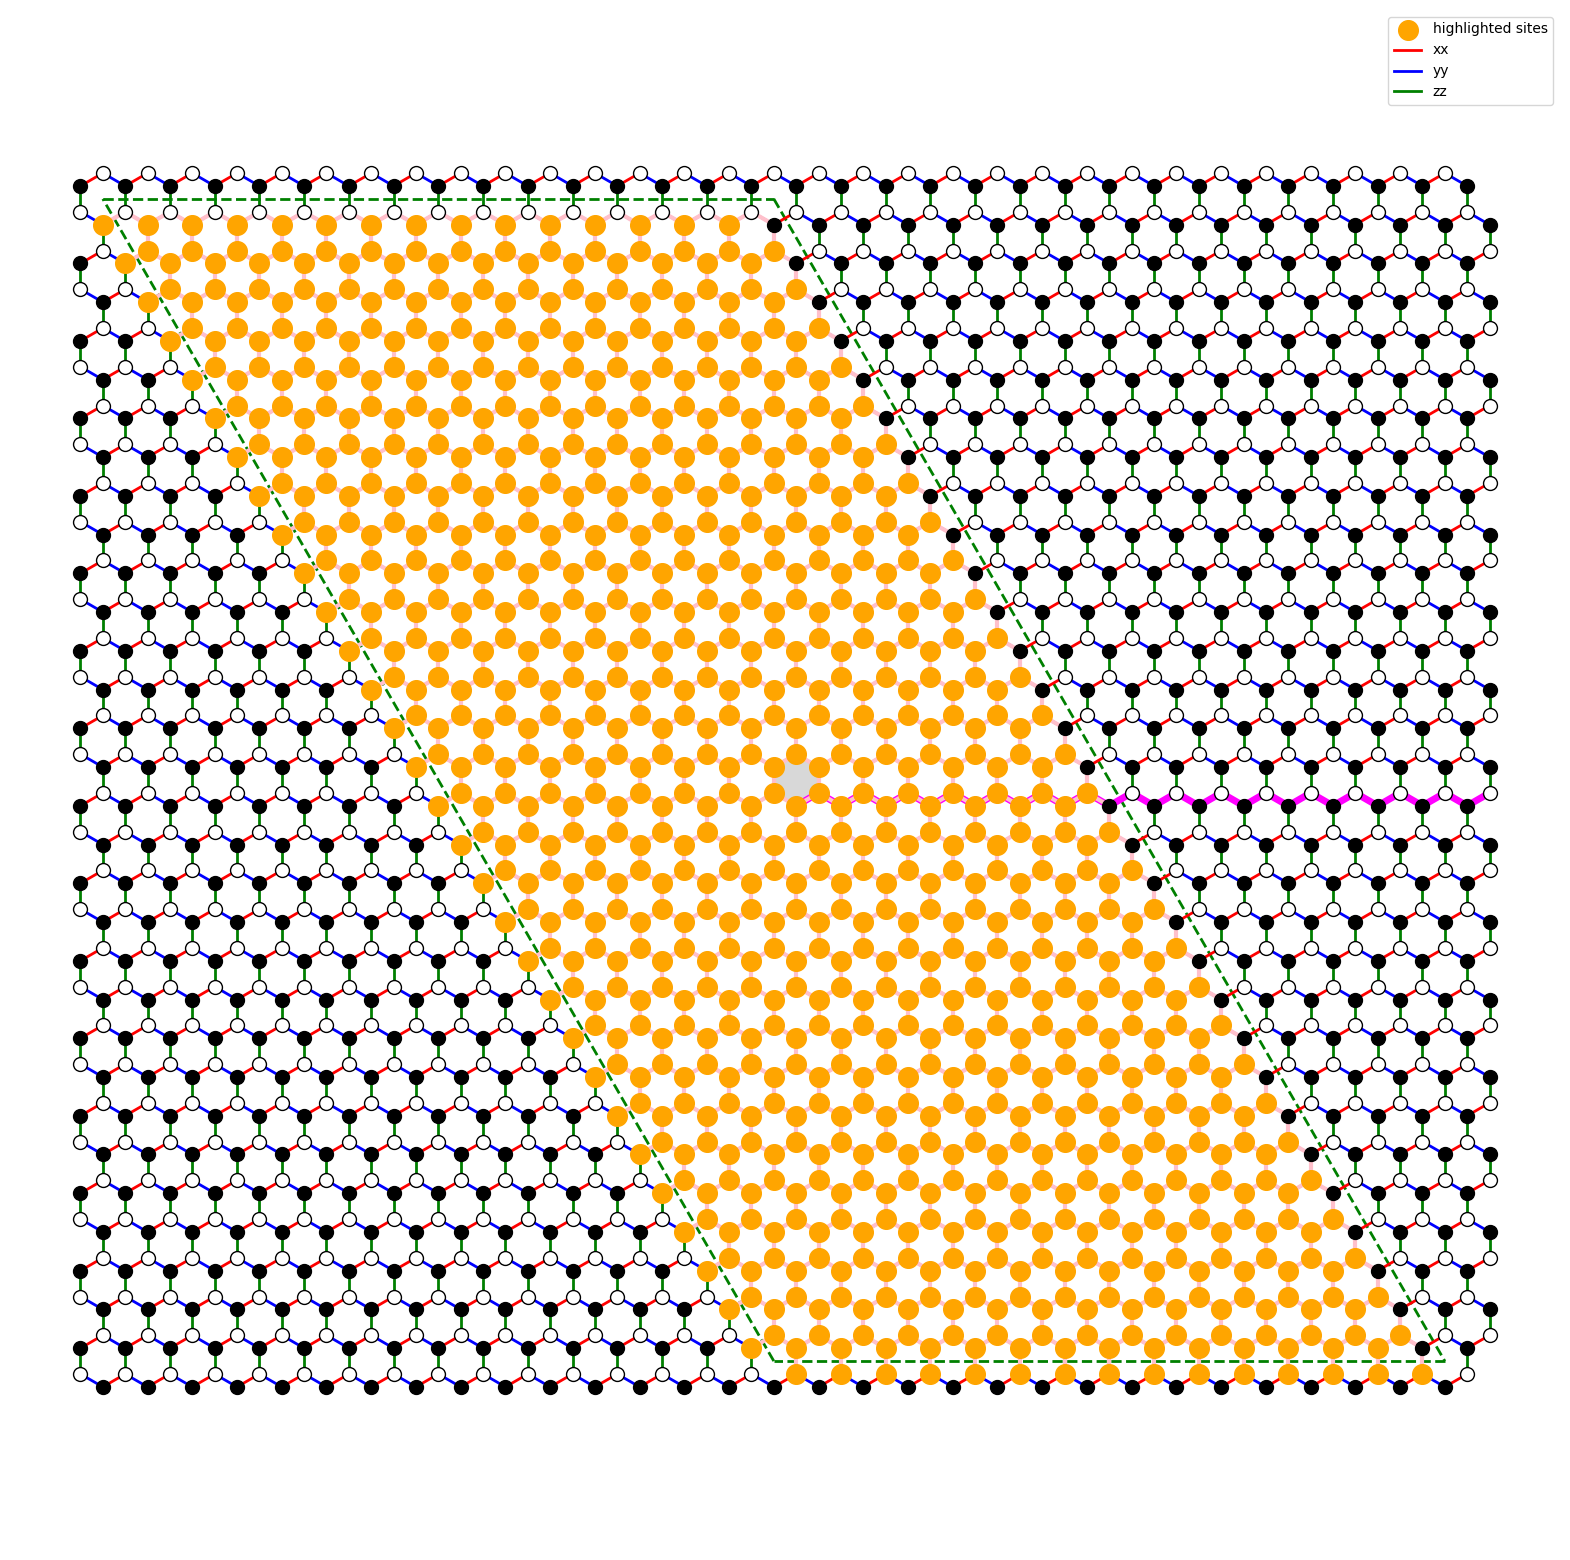

In [2]:
model = site.SitesOBC(Npx = 31, Npy = 31, edge = False)

prefactor, loop_indices, links_list, _ = model.get_loop()

central_plaquette = model.get_anyonbonds()[1]

honey.plot_honeycomb(model, plot_anyon_bonds = True,
                    sites = loop_indices, dotsize = 200,
                    loop = True,
                    plot_diagonal_bonds=False,
                    plaquette_site = central_plaquette,
                    otherbonds_list= links_list
                    )

In [4]:
print(model.Nsites)

2046


In [5]:
fgs = f.FermionicGaussianRepresentation(model)


In [6]:
delta = 0.1
T = 0.8
N_cycles = 14

In [ ]:
# orderpar = PD.order_parameter_delta_T_method1(model, fgs, T, delta,  N_cycles, edgepar = None)[0]

In [144]:
# plt.plot(range(N_cycles+1), orderpar, '.-')
# plt.xlabel('Floquet cycles')
# plt.ylabel(r'$\eta$')
# plt.title(f"Measurement of Loop operator O under Floquet drive for T = {T:.2f}")
# plt.show()

## 2D Phase Diagram

We run the big function!

In [12]:
# delta_list = [0, 0.01, 0.02, 0.03, 0.04]
T_list = np.linspace(1,0.1,10).tolist()

delta_list = [0,0.1,0.2,0.3]
N_cycles = 10

In [7]:
freqs, N_list, data_grid = PD.phase_diagram_slow(model, T_list, delta_list, 
                                                 N_shots = 10, 
                                                 N_cycles = N_cycles, 
                                                 method = '1', 
                                                 save_dir = "pd_2_noedge_normalized", 
                                                 normalize = True)

Deltas:   0%|          | 0/4 [00:00<?, ?it/s]

T for delta=0:   0%|          | 0/10 [00:00<?, ?it/s]

T for delta=0.1:   0%|          | 0/10 [00:00<?, ?it/s]

T for delta=0.2:   0%|          | 0/10 [00:00<?, ?it/s]

T for delta=0.3:   0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
freqs_fast, N_list_fast, data_grid_fast = PD.phase_diagram_fast(model, T_list, delta_list, N_cycles, 
                                                                      N_shots = 10, 
                                                                      method = '1',
                                                                      n_jobs = 5,
                                                                      save_dir = "pd_1_noedge")

Computing 40 (delta, T) points: 0it [00:00, ?it/s]

Computing missing entries:   0%|          | 0/30 [00:00<?, ?it/s]

/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Do the colorplot!

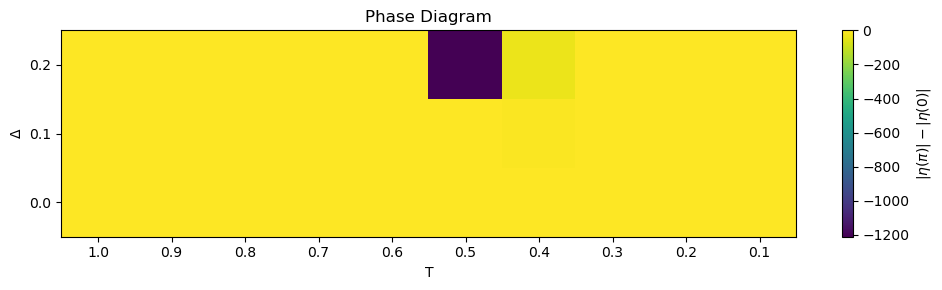

In [64]:
PD.plot_phase_diagram_fromdatagrid(data_grid[:3,:], T_list, delta_list[:3], result = "difference")

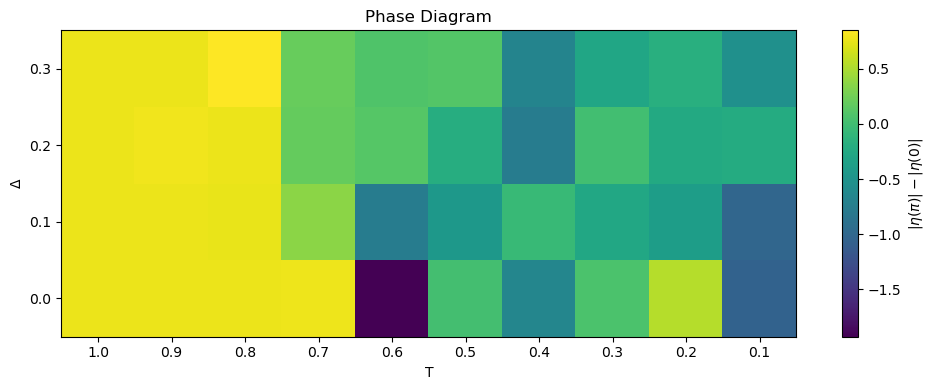

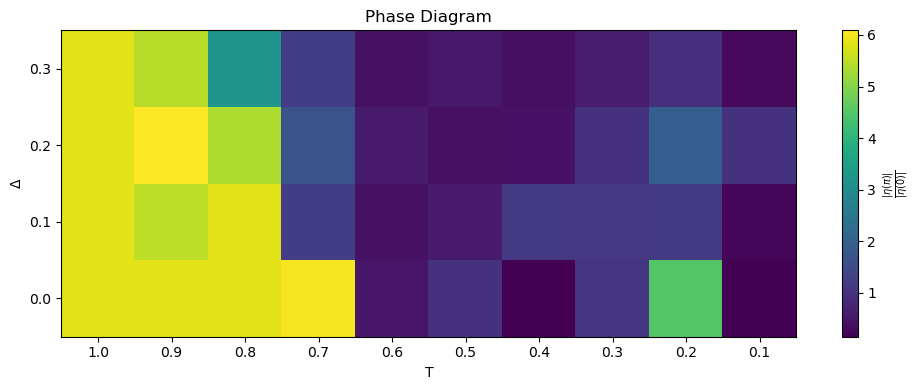

In [120]:
PD.plot_phase_diagram(T_list, delta_list, save_dir = "pd_1_noedge", result = "difference", 
                      #vmin = -5, vmax = 1,
                      #bool_log = True,
                      #save = True,
                      threshold = 2
                      )

PD.plot_phase_diagram(T_list, delta_list, save_dir = "pd_1_noedge", result = "ratio", 
                      #vmin = -5, vmax = 1,
                      #bool_log = True,
                      #save = True,
                      threshold = 7
                      )

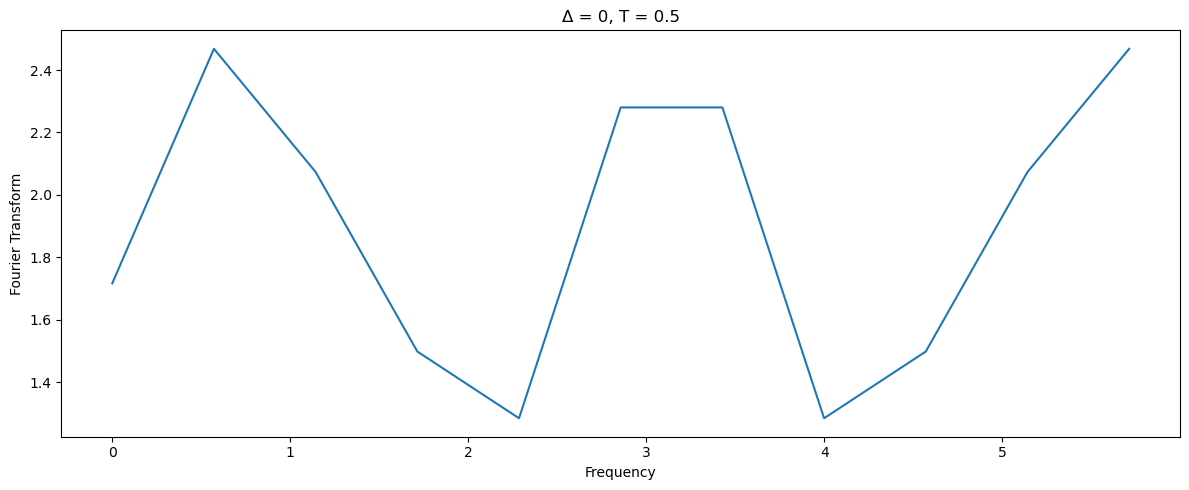

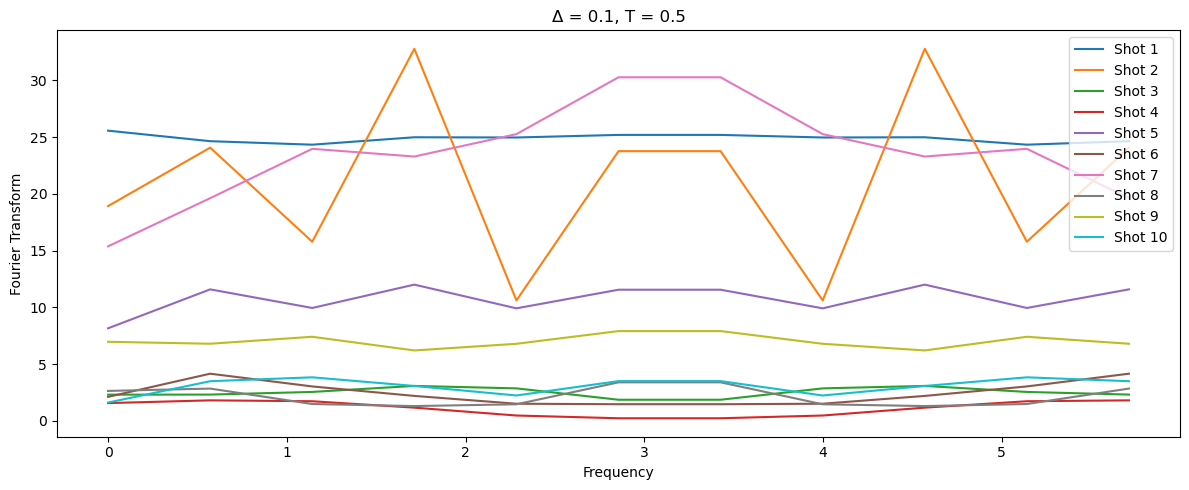

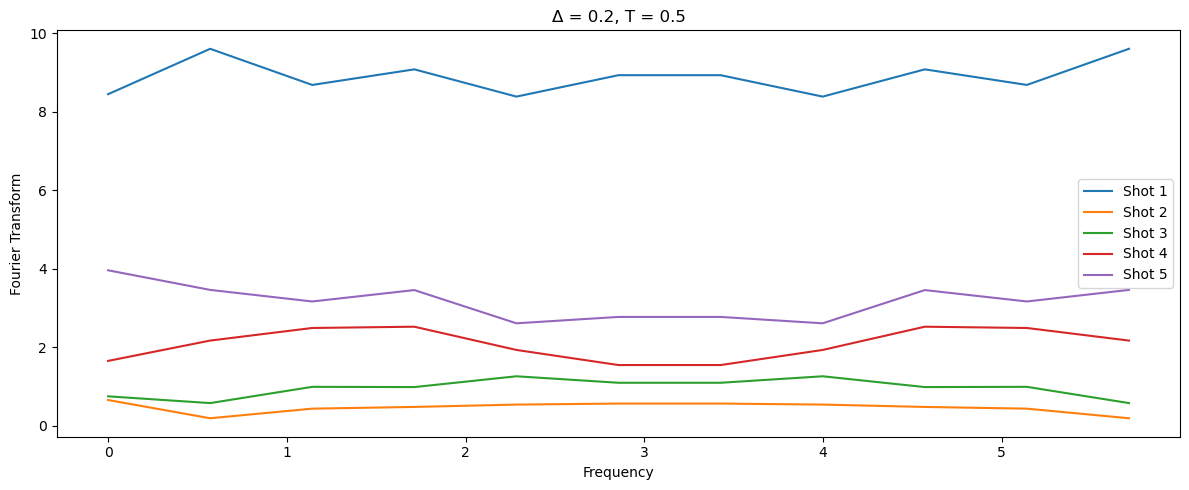

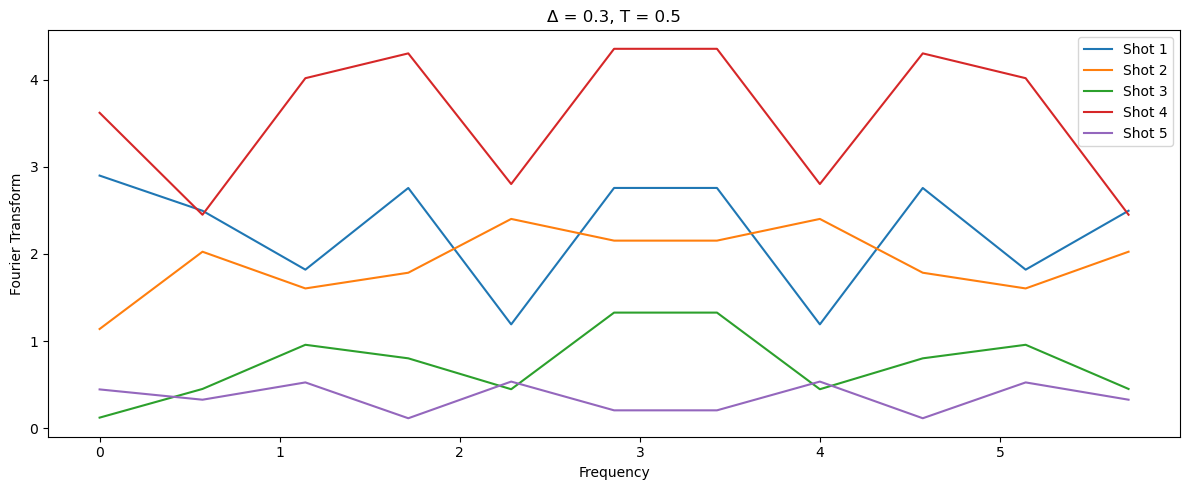

In [110]:
for delta in delta_list:
    PD.plot_single_entry(delta = delta, T = 0.5, T_list = T_list, delta_list = delta_list, N_cycles = N_cycles, 
                        save_dir = "pd_1_noedge", name = "op_ft"
                        , threshold = 10
                        )

## Check variance!

In [114]:
data_grid = PD.load_saved_results(T_list, delta_list, save_dir = "pd_1_noedge", general_dir = "phasediagram")
difference_grid = PD.get_data_grid_results(data_grid, T_list, delta_list, result = "difference")
difference_grid_threshold = PD.get_data_grid_results(data_grid, T_list, delta_list, result = "difference", threshold = 2)

ratio_grid = PD.get_data_grid_results(data_grid, T_list, delta_list, result = "ratio")
ratio_grid_threshold = PD.get_data_grid_results(data_grid, T_list, delta_list, result = "ratio", threshold = 7)

In [118]:
import pandas as pd

# difference_grid is a 2D numpy array (shape: len(delta_list) x len(T_list))
df = pd.DataFrame(difference_grid, index=delta_list, columns=T_list)
df_thre = pd.DataFrame(difference_grid_threshold, index=delta_list, columns=T_list)


# Optionally, rename the index and columns for clarity
df.index.name = 'delta'
df.columns.name = 'T'
df_thre.index.name = 'delta'
df_thre.columns.name = 'T'

# ratio_grid is a 2D numpy array (shape: len(delta_list) x len(T_list))
rt = pd.DataFrame(ratio_grid, index=delta_list, columns=T_list)
rt_thre = pd.DataFrame(ratio_grid_threshold, index=delta_list, columns=T_list)

# Optionally, rename the index and columns for clarity
rt.index.name = 'delta'
rt.columns.name = 'T'
rt_thre.index.name = 'delta'
rt_thre.columns.name = 'T'

# Export to Excel
with pd.ExcelWriter("phase_diagram_tables.xlsx") as writer:
    df.to_excel(writer, sheet_name="difference", startrow=0)
    # Write the second table below the first (add space if you want)
    df_thre.to_excel(writer, sheet_name="difference", startrow=len(df)+6)
    rt.to_excel(writer, sheet_name="ratio", startrow=0)
    # Write the second table below the first (add space if you want)
    rt_thre.to_excel(writer, sheet_name="ratio", startrow=len(rt)+6)

## Check if fast and slow algorithm match!

In [235]:
# Choose the specific values you're interested in
delta_target = 0
T_target = T_list[9]

# Get indices from mapping
i = delta_list.index(delta_target)
j = T_list.index(T_target)

# Access the dictionary stored at that position
entry = data_grid[i, j]
entry_fast = data_grid_fast[i,j]

# Extract what you want
op_real = entry['op_real']
op_ft = entry['op_ft']

op_real_fast = entry_fast['op_real']
op_ft_fast = entry_fast['op_ft']


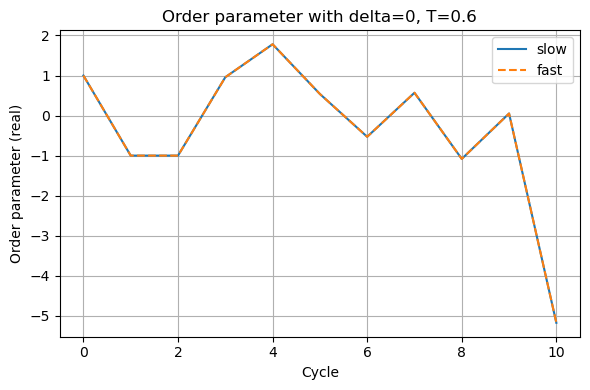

In [236]:
plt.figure(figsize=(6, 4))
plt.plot(np.arange(N_cycles+1)[:11], op_real, label="slow")
plt.plot(np.arange(N_cycles+1)[:11], op_real_fast[:11], '--', label = "fast")
plt.xlabel("Cycle")
plt.ylabel("Order parameter (real)")
plt.title(f"Order parameter with delta={delta_target}, T={T_target}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Other plots of op_real

with fast and slow algorithm along all T for delta = 0

NameError: name 'data_grid_fast' is not defined

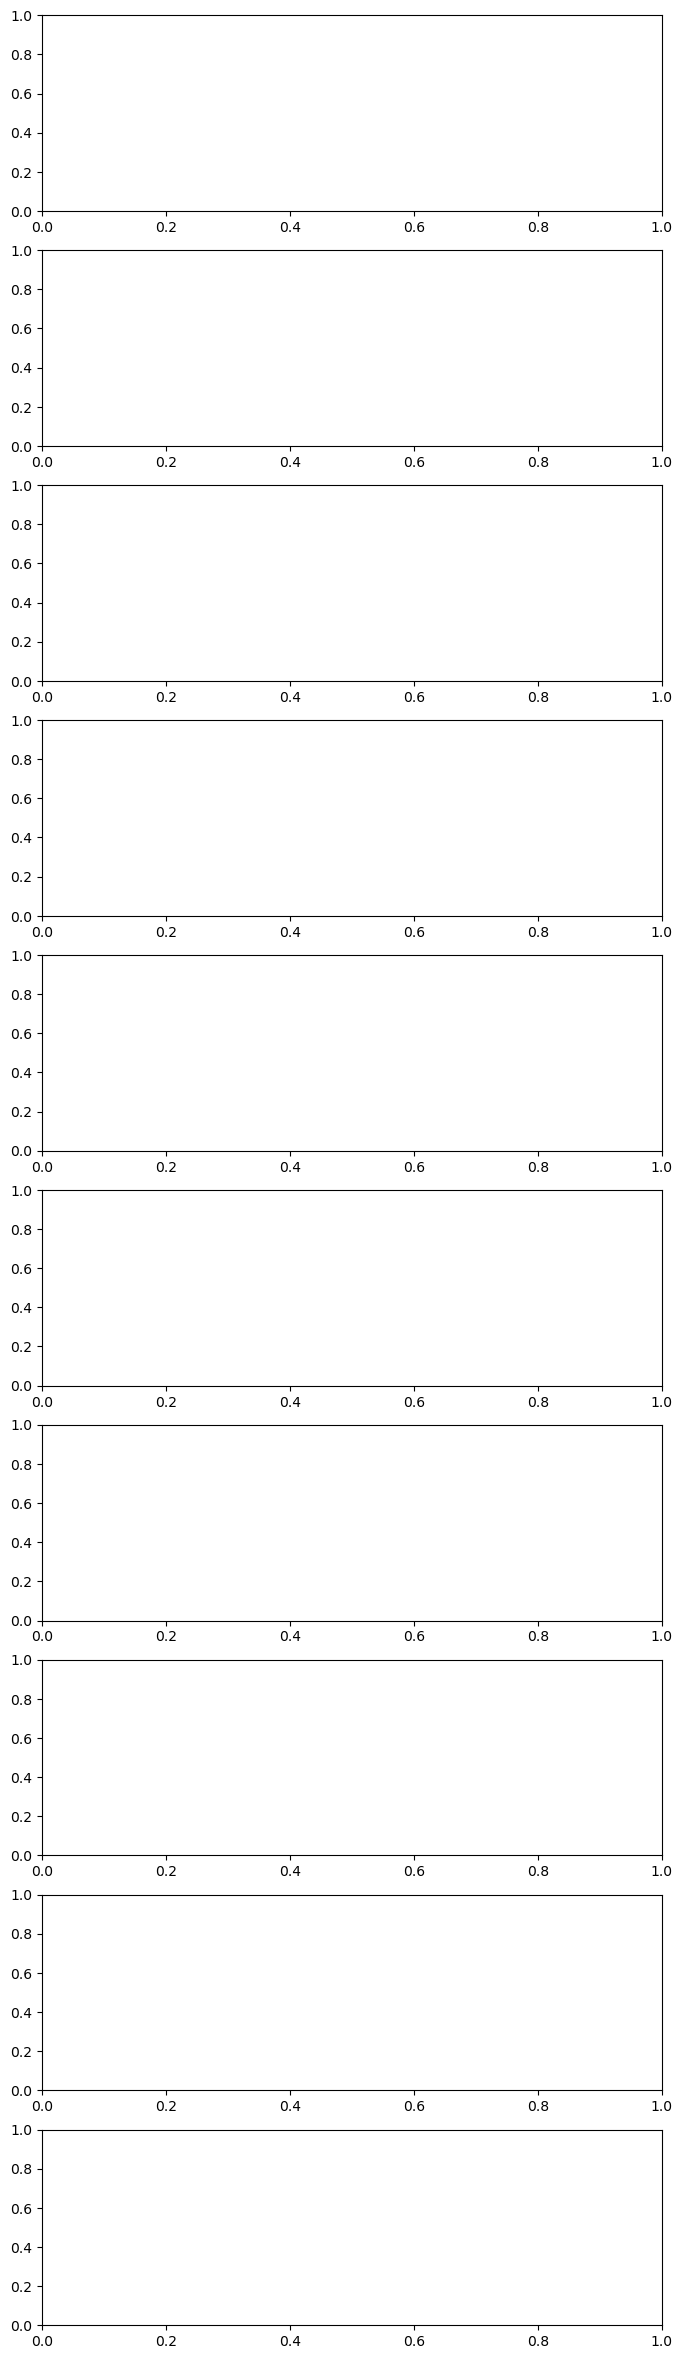

In [60]:
nrows = len(T_list)
ncols = 1 
fig, ax = plt.subplots(nrows = nrows, ncols=ncols, figsize= (8,nrows*3))

delta_target = 0
i = delta_list.index(delta_target)


for idx, T in enumerate(T_list):
    # Choose the specific values you're interested in

    T_target = T

    # Get indices from mapping
    j = T_list.index(T_target)

    # Access the dictionary stored at that position
    entry = data_grid[i, j]
    entry_fast = data_grid_fast[i,j]

    # Extract what you want
    op_real = entry['op_real']

    op_real_fast = entry_fast['op_real']

    #ax[idx].plot(np.arange(N_cycles+1), op_real, '.-', color = "orange", label= "slow")
    ax[idx].plot(np.arange(N_cycles+1), op_real_fast, '--', color = "blue", label = "fast")
    ax[idx].set_title(f"delta={delta_target}, T={T_target:.2f}")
    ax[idx].set_xlabel("Cycle")
    ax[idx].set_ylabel(r"$\eta$")
    ax[idx].legend()
plt.tight_layout()
plt.show()

with fast and slow algorithm along all T for delta = 0.01

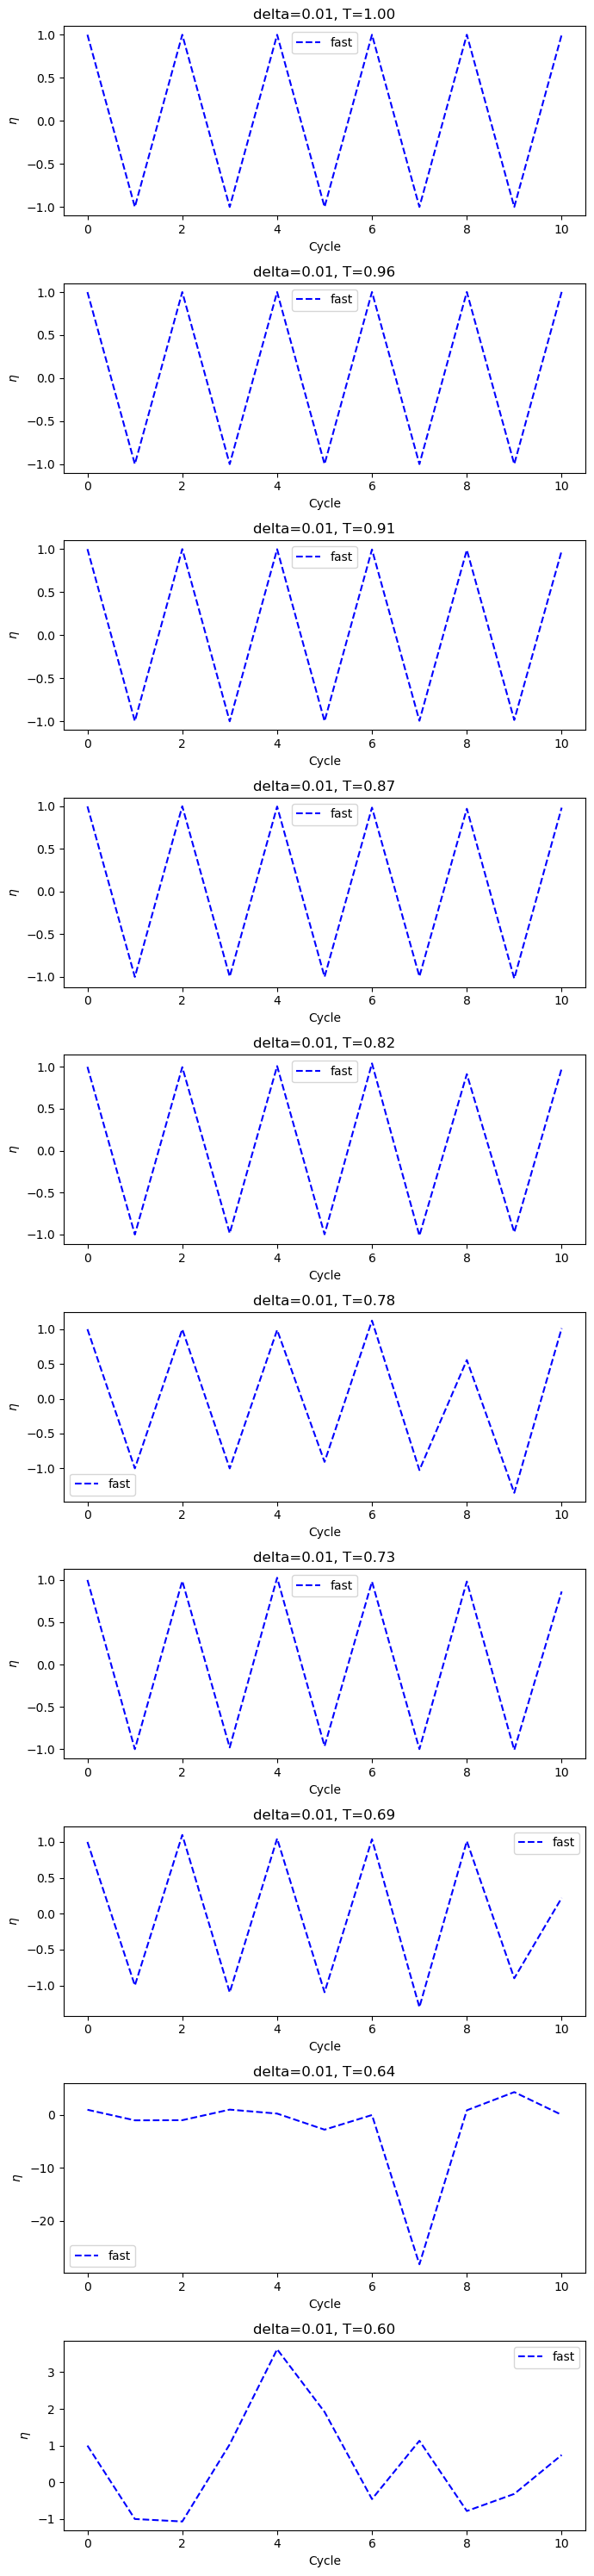

In [267]:
nrows = len(T_list)
ncols = 1 
fig, ax = plt.subplots(nrows = nrows, ncols=ncols, figsize= (7,nrows*3))

delta_target = 0.01
i = delta_list.index(delta_target)


for idx, T in enumerate(T_list):
    # Choose the specific values you're interested in

    T_target = T

    # Get indices from mapping
    j = T_list.index(T_target)

    # Access the dictionary stored at that position
    #entry = data_grid[i, j]
    entry_fast = data_grid_fast[i,j]

    # Extract what you want
    op_real = entry['op_real']

    op_real_fast = entry_fast['op_real']


# result = []
# for i in range(len(op_real_fast[0])):  # iterate over column indices
#     column = [sublist[i] for sublist in op_real_fast]  # take i-th element from each sublist
#     result.append(np.mean(column))

#same as doing

    result = np.mean(op_real_fast, axis=0)

    #ax[idx].plot(np.arange(N_cycles+1), op_real, '.-', color = "orange", label= "slow")
    ax[idx].plot(np.arange(N_cycles+1), result, '--', color = "blue", label = "fast")
    ax[idx].set_title(f"delta={delta_target}, T={T_target:.2f}")
    ax[idx].set_xlabel("Cycle")
    ax[idx].set_ylabel(r"$\eta$")
    ax[idx].legend()
plt.tight_layout()
plt.show()